# Gluon Crash Course 

This is the mxnet crash code which can be found at https://mxnet.apache.org/versions/1.8.0/api/python/docs/tutorials/getting-started/crash-course/index.html as well as a Tutorial for Handwritten Digit Recognition which can be found at https://mxnet.apache.org/versions/1.8.0/api/python/docs/tutorials/packages/gluon/image/mnist.html#Training

Both tutorials worked without any errors. In order to use multiple GPUs on google colab the d2l module was imported in the section "Use GPUs".

# **Manipulate data with ndarray**

In [28]:
# If you haven't installed MXNet yet, you can uncomment the following line to
# install the latest stable release
!pip install mxnet-cu100

from mxnet import nd

     |████████████████████████████████| 352.6MB 47kB/s 


In [29]:
nd.array(((1,2,3),(5,6,7)))


[[1. 2. 3.]
 [5. 6. 7.]]
<NDArray 2x3 @cpu(0)>

In [30]:
x = nd.ones((2,3))
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [31]:
y = nd.random.uniform(-1,1,(2,3))
y


[[-0.68570805 -0.7316899   0.30156887]
 [ 0.38699007 -0.7863959   0.58233285]]
<NDArray 2x3 @cpu(0)>

In [32]:
(x.shape, x.size, x.dtype)

((2, 3), 6, numpy.float32)

In [33]:
y[1,2]


[0.58233285]
<NDArray 1 @cpu(0)>

In [34]:
y[:,1:3]


[[-0.7316899   0.30156887]
 [-0.7863959   0.58233285]]
<NDArray 2x2 @cpu(0)>

In [35]:
y[:,1:3] = 2
y


[[-0.68570805  2.          2.        ]
 [ 0.38699007  2.          2.        ]]
<NDArray 2x3 @cpu(0)>

In [36]:
y[1:2,0:2] = 4
y


[[-0.68570805  2.          2.        ]
 [ 4.          4.          2.        ]]
<NDArray 2x3 @cpu(0)>

In [37]:
a = x.asnumpy()
(type(a), a)

(numpy.ndarray, array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32))

In [38]:
nd.array(a)


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

# **Create a neural network**

In [39]:
from mxnet import nd
from mxnet.gluon import nn

In [40]:
layer = nn.Dense(2)
layer

Dense(None -> 2, linear)

In [41]:
layer.initialize()

In [42]:
x = nd.random.uniform(-1,1,(3,4))
layer(x)



[[-0.01662923  0.06106782]
 [ 0.03683347 -0.03663786]
 [-0.0099416   0.09988014]]
<NDArray 3x2 @cpu(0)>

In [43]:
layer.weight.data()


[[ 0.03126474  0.017447    0.01159232 -0.03893754]
 [ 0.06324176  0.05514552 -0.04867891  0.05439345]]
<NDArray 2x4 @cpu(0)>

In [44]:
net = nn.Sequential()
# Add a sequence of layers.
net.add(# Similar to Dense, it is not necessary to specify the input channels
        # by the argument `in_channels`, which will be  automatically inferred
        # in the first forward pass. Also, we apply a relu activation on the
        # output. In addition, we can use a tuple to specify a  non-square
        # kernel size, such as `kernel_size=(2,4)`
        nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        # One can also use a tuple to specify non-symmetric pool and stride sizes
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        # The dense layer will automatically reshape the 4-D output of last
        # max pooling layer into the 2-D shape: (x.shape[0], x.size/x.shape[0])
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(relu))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1), Activation(relu))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Dense(None -> 120, Activation(relu))
  (5): Dense(None -> 84, Activation(relu))
  (6): Dense(None -> 10, linear)
)

In [45]:
net.initialize()
# Input shape is (batch_size, color_channels, height, width)
x = nd.random.uniform(shape=(4,1,28,28))
y = net(x)
y.shape

(4, 10)

In [46]:
(net[0].weight.data().shape, net[5].bias.data().shape)

((6, 1, 5, 5), (84,))

In [47]:
class MixMLP(nn.Block):
    def __init__(self, **kwargs):
        # Run `nn.Block`'s init method
        super(MixMLP, self).__init__(**kwargs)
        self.blk = nn.Sequential()
        self.blk.add(nn.Dense(3, activation='relu'),
                     nn.Dense(4, activation='relu'))
        self.dense = nn.Dense(5)
    def forward(self, x):
        y = nd.relu(self.blk(x))
        print(y)
        return self.dense(y)

net = MixMLP()
net

MixMLP(
  (blk): Sequential(
    (0): Dense(None -> 3, Activation(relu))
    (1): Dense(None -> 4, Activation(relu))
  )
  (dense): Dense(None -> 5, linear)
)

In [48]:
net.initialize()
x = nd.random.uniform(shape=(2,2))
net(x)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 2x4 @cpu(0)>



[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<NDArray 2x5 @cpu(0)>

In [49]:
net.blk[1].weight.data()


[[ 0.04793114 -0.00180743  0.03089273]
 [ 0.03962107  0.02081677 -0.06987108]
 [ 0.05730059  0.00376511 -0.00151725]
 [ 0.0646903   0.00878946 -0.00665336]]
<NDArray 4x3 @cpu(0)>

# **Automatic differentiation with autograd**

In [50]:
from mxnet import nd
from mxnet import autograd

In [51]:
x = nd.array([[1, 2], [3, 4]])
x


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

In [52]:
x.attach_grad()


In [53]:
with autograd.record():
    y = 2 * x * x

In [54]:
y.backward()

In [55]:
x.grad


[[ 4.  8.]
 [12. 16.]]
<NDArray 2x2 @cpu(0)>

In [56]:
def f(a):
    b = a * 2
    while b.norm().asscalar() < 1000:
        b = b * 2
    if b.sum().asscalar() >= 0:
        c = b[0]
    else:
        c = b[1]
    return c

In [57]:
a = nd.random.uniform(shape=2)
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()

In [58]:
[a.grad, c/a]

[
 [4096.    0.]
 <NDArray 2 @cpu(0)>, 
 [4096.     5878.3145]
 <NDArray 2 @cpu(0)>]

# **Train the neural network**

In [59]:
from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt
import time

In [60]:
mnist_train = datasets.FashionMNIST(train=True)
X, y = mnist_train[0]
('X shape: ', X.shape, 'X dtype', X.dtype, 'y:', y)

('X shape: ', (28, 28, 1), 'X dtype', numpy.uint8, 'y:', 2)

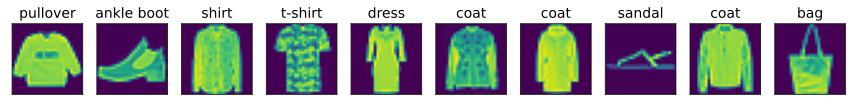

In [61]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
X, y = mnist_train[0:10]
# plot images
display.set_matplotlib_formats('svg')
_, figs = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f,x,yi in zip(figs, X,y):
    # 3D->2D by removing the last channel dim
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[int(yi)])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [62]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])
mnist_train = mnist_train.transform_first(transformer)

In [63]:
batch_size = 256
train_data = gluon.data.DataLoader(
    mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

In [64]:
for data, label in train_data:
    print(data.shape, label.shape)
    break

(256, 1, 28, 28) (256,)


In [65]:
mnist_valid = gluon.data.vision.FashionMNIST(train=False)
valid_data = gluon.data.DataLoader(
    mnist_valid.transform_first(transformer),
    batch_size=batch_size, num_workers=4)

In [66]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.initialize(init=init.Xavier())

In [67]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

In [68]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [69]:
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (output.argmax(axis=1) ==
            label.astype('float32')).mean().asscalar()

In [70]:
for epoch in range(10):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time.time()
    for data, label in train_data:
        # forward + backward
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        train_loss += loss.mean().asscalar()
        train_acc += acc(output, label)
    # calculate validation accuracy
    for data, label in valid_data:
        valid_acc += acc(net(data), label)
    print("Epoch %d: loss %.3f, train acc %.3f, test acc %.3f, in %.1f sec" % (
            epoch, train_loss/len(train_data), train_acc/len(train_data),
            valid_acc/len(valid_data), time.time()-tic))

Epoch 0: loss 0.745, train acc 0.721, test acc 0.827, in 24.5 sec
Epoch 1: loss 0.466, train acc 0.826, test acc 0.853, in 24.1 sec
Epoch 2: loss 0.406, train acc 0.849, test acc 0.863, in 23.5 sec
Epoch 3: loss 0.367, train acc 0.865, test acc 0.872, in 23.6 sec
Epoch 4: loss 0.340, train acc 0.874, test acc 0.871, in 23.9 sec
Epoch 5: loss 0.319, train acc 0.882, test acc 0.885, in 23.6 sec
Epoch 6: loss 0.303, train acc 0.888, test acc 0.890, in 23.3 sec
Epoch 7: loss 0.292, train acc 0.891, test acc 0.890, in 23.5 sec
Epoch 8: loss 0.283, train acc 0.894, test acc 0.888, in 24.3 sec
Epoch 9: loss 0.272, train acc 0.898, test acc 0.892, in 24.4 sec


In [71]:
net.save_parameters('net.params')

# **Predict with a pre-trained model**

In [72]:
from mxnet import nd
from mxnet import gluon
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt

In [73]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))

In [74]:
net.load_parameters('net.params')

In [75]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

In [76]:
mnist_valid = datasets.FashionMNIST(train=False)
X, y = mnist_valid[:10]
preds = []
for x in X:
    x = transformer(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

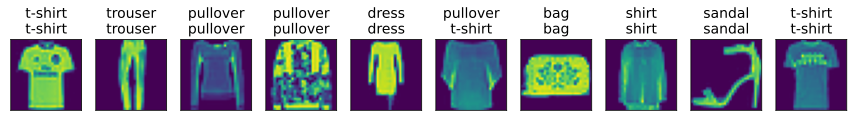

In [77]:
_, figs = plt.subplots(1, 10, figsize=(15, 15))
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
display.set_matplotlib_formats('svg')
for f,x,yi,pyi in zip(figs, X, y, preds):
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[yi]+'\n'+text_labels[pyi])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [78]:
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.utils import download
from mxnet import image

net = models.resnet50_v2(pretrained=True)

In [79]:
url = 'http://data.mxnet.io/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]

In [80]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/\
Golden_Retriever_medium-to-light-coat.jpg/\
365px-Golden_Retriever_medium-to-light-coat.jpg'
fname = download(url)
x = image.imread(fname)

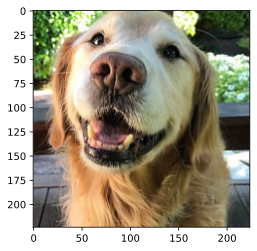

In [81]:
x = image.resize_short(x, 256)
x, _ = image.center_crop(x, (224,224))
plt.imshow(x.asnumpy())
plt.show()

In [82]:
def transform(data):
    data = data.transpose((2,0,1)).expand_dims(axis=0)
    rgb_mean = nd.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
    rgb_std = nd.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
    return (data.astype('float32') / 255 - rgb_mean) / rgb_std

In [83]:
prob = net(transform(x)).softmax()
idx = prob.topk(k=5)[0]
for i in idx:
    i = int(i.asscalar())
    print('With prob = %.5f, it contains %s' % (
        prob[0,i].asscalar(), text_labels[i]))

With prob = 0.98323, it contains golden retriever
With prob = 0.00729, it contains English setter
With prob = 0.00297, it contains Irish setter, red setter
With prob = 0.00224, it contains cocker spaniel, English cocker spaniel, cocker
With prob = 0.00147, it contains Labrador retriever


# **Use GPUs**

In [84]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.2
from mxnet import nd, gpu, gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import time
from d2l import mxnet as d2l

Requirement already up-to-date: mxnet-cu101==1.7.0 in /usr/local/lib/python3.7/dist-packages (1.7.0)


In [85]:
x = nd.ones((3,4), ctx=gpu())
x


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @gpu(0)>

The Tutorial was adapeted here in order to allow the usage of multiple GPUs on google colab

```
# Als Code formatiert
```



In [86]:

x.copyto(d2l.try_gpu(1))
# Doesn't work on colab, as only one GPU is used 


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @cpu(0)>

In [87]:
y = nd.random.uniform(shape=(3,4), ctx=gpu())
x + y


[[1.1826111 1.4855869 1.2355132 1.6955829]
 [1.5746396 1.0816584 1.0388997 1.3750937]
 [1.8552965 1.6191106 1.2801125 1.9333761]]
<NDArray 3x4 @gpu(0)>

In [88]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))

In [89]:
net.load_parameters('net.params', ctx=gpu(0))

In [90]:
x = nd.random.uniform(shape=(1,1,28,28), ctx=gpu(0))
net(x)


[[ 1.1053015  -0.15635306  1.3680272   0.25438887  0.2831083  -1.7423886
   1.5156552  -1.3906093   0.28807878 -1.1646396 ]]
<NDArray 1x10 @gpu(0)>

In [91]:
batch_size = 256
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])
train_data = gluon.data.DataLoader(
    datasets.FashionMNIST(train=True).transform_first(transformer),
    batch_size, shuffle=True, num_workers=4)
valid_data = gluon.data.DataLoader(
    datasets.FashionMNIST(train=False).transform_first(transformer),
    batch_size, shuffle=False, num_workers=4)


In [92]:
# Diff 1: Use two GPUs for training.
devices = [d2l.try_gpu(0), d2l.try_gpu(1)]
# Diff 2: reinitialize the parameters and place them on multiple GPUs
net.collect_params().initialize(force_reinit=True, ctx=devices)
# Loss and trainer are the same as before
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})
for epoch in range(10):
    train_loss = 0.
    tic = time.time()
    for data, label in train_data:
        # Diff 3: split batch and load into corresponding devices
        data_list = gluon.utils.split_and_load(data, devices)
        label_list = gluon.utils.split_and_load(label, devices)
        # Diff 4: run forward and backward on each devices.
        # MXNet will automatically run them in parallel
        with autograd.record():
            losses = [softmax_cross_entropy(net(X), y)
                      for X, y in zip(data_list, label_list)]
        for l in losses:
            l.backward()
        trainer.step(batch_size)
        # Diff 5: sum losses over all devices
        train_loss += sum([l.sum().asscalar() for l in losses])
    print("Epoch %d: loss %.3f, in %.1f sec" % (
        epoch, train_loss/len(train_data)/batch_size, time.time()-tic))

Epoch 0: loss 1.672, in 17.7 sec
Epoch 1: loss 0.742, in 17.2 sec
Epoch 2: loss 0.576, in 17.3 sec
Epoch 3: loss 0.502, in 17.4 sec
Epoch 4: loss 0.459, in 17.8 sec
Epoch 5: loss 0.422, in 17.8 sec
Epoch 6: loss 0.393, in 17.6 sec
Epoch 7: loss 0.369, in 17.4 sec
Epoch 8: loss 0.353, in 17.5 sec
Epoch 9: loss 0.336, in 17.6 sec


# ****Handwritten Digit Recognition****

In [93]:
!pip install -U mxnet-cu101==1.7.0
import mxnet as mx
# Fixing the random seed
mx.random.seed(42)
mnist = mx.test_utils.get_mnist()

Requirement already up-to-date: mxnet-cu101==1.7.0 in /usr/local/lib/python3.7/dist-packages (1.7.0)


In [94]:
batch_size = 100
train_data = mx.io.NDArrayIter(mnist['train_data'], mnist['train_label'], batch_size, shuffle=True)
val_data = mx.io.NDArrayIter(mnist['test_data'], mnist['test_label'], batch_size)

In [95]:
from __future__ import print_function
import mxnet as mx
from mxnet import gluon
from mxnet.gluon import nn
from mxnet import autograd as ag

In [96]:
# define network
net = nn.Sequential()
with net.name_scope():
    net.add(nn.Dense(128, activation='relu'))
    net.add(nn.Dense(64, activation='relu'))
    net.add(nn.Dense(10))

In [97]:
gpus = mx.test_utils.list_gpus()
ctx =  [mx.gpu()] if gpus else [mx.cpu(0), mx.cpu(1)]
net.initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.02})

In [98]:
%%time
epoch = 10
# Use Accuracy as the evaluation metric.
metric = mx.metric.Accuracy()
softmax_cross_entropy_loss = gluon.loss.SoftmaxCrossEntropyLoss()
for i in range(epoch):
    # Reset the train data iterator.
    train_data.reset()
    # Loop over the train data iterator.
    for batch in train_data:
        # Splits train data into multiple slices along batch_axis
        # and copy each slice into a context.
        data = gluon.utils.split_and_load(batch.data[0], ctx_list=ctx, batch_axis=0)
        # Splits train labels into multiple slices along batch_axis
        # and copy each slice into a context.
        label = gluon.utils.split_and_load(batch.label[0], ctx_list=ctx, batch_axis=0)
        outputs = []
        # Inside training scope
        with ag.record():
            for x, y in zip(data, label):
                z = net(x)
                # Computes softmax cross entropy loss.
                loss = softmax_cross_entropy_loss(z, y)
                # Backpropagate the error for one iteration.
                loss.backward()
                outputs.append(z)
        # Updates internal evaluation
        metric.update(label, outputs)
        # Make one step of parameter update. Trainer needs to know the
        # batch size of data to normalize the gradient by 1/batch_size.
        trainer.step(batch.data[0].shape[0])
    # Gets the evaluation result.
    name, acc = metric.get()
    # Reset evaluation result to initial state.
    metric.reset()
    print('training acc at epoch %d: %s=%f'%(i, name, acc))

training acc at epoch 0: accuracy=0.782100
training acc at epoch 1: accuracy=0.899917
training acc at epoch 2: accuracy=0.914450
training acc at epoch 3: accuracy=0.924017
training acc at epoch 4: accuracy=0.931417
training acc at epoch 5: accuracy=0.937533
training acc at epoch 6: accuracy=0.942600
training acc at epoch 7: accuracy=0.946417
training acc at epoch 8: accuracy=0.950217
training acc at epoch 9: accuracy=0.954050
CPU times: user 32.8 s, sys: 5.31 s, total: 38.1 s
Wall time: 27.3 s


In [99]:
# Use Accuracy as the evaluation metric.
metric = mx.metric.Accuracy()
# Reset the validation data iterator.
val_data.reset()
# Loop over the validation data iterator.
for batch in val_data:
    # Splits validation data into multiple slices along batch_axis
    # and copy each slice into a context.
    data = gluon.utils.split_and_load(batch.data[0], ctx_list=ctx, batch_axis=0)
    # Splits validation label into multiple slices along batch_axis
    # and copy each slice into a context.
    label = gluon.utils.split_and_load(batch.label[0], ctx_list=ctx, batch_axis=0)
    outputs = []
    for x in data:
        outputs.append(net(x))
    # Updates internal evaluation
    metric.update(label, outputs)
print('validation acc: %s=%f'%metric.get())
assert metric.get()[1] > 0.94

validation acc: accuracy=0.953700


In [100]:
import mxnet.ndarray as F

class Net(gluon.Block):
    def __init__(self, **kwargs):
        super(Net, self).__init__(**kwargs)
        with self.name_scope():
            # layers created in name_scope will inherit name space
            # from parent layer.
            self.conv1 = nn.Conv2D(20, kernel_size=(5,5))
            self.pool1 = nn.MaxPool2D(pool_size=(2,2), strides = (2,2))
            self.conv2 = nn.Conv2D(50, kernel_size=(5,5))
            self.pool2 = nn.MaxPool2D(pool_size=(2,2), strides = (2,2))
            self.fc1 = nn.Dense(500)
            self.fc2 = nn.Dense(10)

    def forward(self, x):
        x = self.pool1(F.tanh(self.conv1(x)))
        x = self.pool2(F.tanh(self.conv2(x)))
        # 0 means copy over size from corresponding dimension.
        # -1 means infer size from the rest of dimensions.
        x = x.reshape((0, -1))
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        return x

In [101]:
net = Net()

In [102]:
# set the context on GPU is available otherwise CPU
ctx = [mx.gpu() if mx.test_utils.list_gpus() else mx.cpu()]
net.initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [103]:
# Use Accuracy as the evaluation metric.
metric = mx.metric.Accuracy()
softmax_cross_entropy_loss = gluon.loss.SoftmaxCrossEntropyLoss()

for i in range(epoch):
    # Reset the train data iterator.
    train_data.reset()
    # Loop over the train data iterator.
    for batch in train_data:
        # Splits train data into multiple slices along batch_axis
        # and copy each slice into a context.
        data = gluon.utils.split_and_load(batch.data[0], ctx_list=ctx, batch_axis=0)
        # Splits train labels into multiple slices along batch_axis
        # and copy each slice into a context.
        label = gluon.utils.split_and_load(batch.label[0], ctx_list=ctx, batch_axis=0)
        outputs = []
        # Inside training scope
        with ag.record():
            for x, y in zip(data, label):
                z = net(x)
                # Computes softmax cross entropy loss.
                loss = softmax_cross_entropy_loss(z, y)
                # Backpropogate the error for one iteration.
                loss.backward()
                outputs.append(z)
        # Updates internal evaluation
        metric.update(label, outputs)
        # Make one step of parameter update. Trainer needs to know the
        # batch size of data to normalize the gradient by 1/batch_size.
        trainer.step(batch.data[0].shape[0])
    # Gets the evaluation result.
    name, acc = metric.get()
    # Reset evaluation result to initial state.
    metric.reset()
    print('training acc at epoch %d: %s=%f'%(i, name, acc))

training acc at epoch 0: accuracy=0.862367
training acc at epoch 1: accuracy=0.937117
training acc at epoch 2: accuracy=0.953317
training acc at epoch 3: accuracy=0.961883
training acc at epoch 4: accuracy=0.967900
training acc at epoch 5: accuracy=0.971417
training acc at epoch 6: accuracy=0.974267
training acc at epoch 7: accuracy=0.976183
training acc at epoch 8: accuracy=0.978733
training acc at epoch 9: accuracy=0.980283


In [104]:
# Use Accuracy as the evaluation metric.
metric = mx.metric.Accuracy()
# Reset the validation data iterator.
val_data.reset()
# Loop over the validation data iterator.
for batch in val_data:
    # Splits validation data into multiple slices along batch_axis
    # and copy each slice into a context.
    data = gluon.utils.split_and_load(batch.data[0], ctx_list=ctx, batch_axis=0)
    # Splits validation label into multiple slices along batch_axis
    # and copy each slice into a context.
    label = gluon.utils.split_and_load(batch.label[0], ctx_list=ctx, batch_axis=0)
    outputs = []
    for x in data:
        outputs.append(net(x))
    # Updates internal evaluation
    metric.update(label, outputs)
print('validation acc: %s=%f'%metric.get())
assert metric.get()[1] > 0.98

validation acc: accuracy=0.981100
